In [1]:
import pandas as pd

accomodations_clusters = pd.read_csv('https://raw.githubusercontent.com/gr-oll/SLO_LA_Olympics/main/datasets/clusters_central_location.csv')
venues = pd.read_csv('https://raw.githubusercontent.com/gr-oll/SLO_LA_Olympics/main/datasets/venues.csv')
time_matrix = pd.read_csv('https://raw.githubusercontent.com/gr-oll/SLO_LA_Olympics/main/matrixes/time_matrix.csv')
bus_matrix = pd.read_csv('https://raw.githubusercontent.com/gr-oll/SLO_LA_Olympics/main/matrixes/accomodations_to_venues.csv')
bus_terminals = pd.read_csv('https://raw.githubusercontent.com/gr-oll/SLO_LA_Olympics/main/datasets/bus_terminals.csv')
merged_matrix = pd.read_csv('https://raw.githubusercontent.com/gr-oll/SLO_LA_Olympics/main/matrixes/merged_matrix.csv')

In [2]:
venues = venues.dropna()

In [3]:
import folium

# Create a map centered at the average latitude and longitude
map_center = [accomodations_clusters['avg_latitude'].mean(), accomodations_clusters['avg_longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# Add markers for each cluster
for _, row in accomodations_clusters.iterrows():
    folium.Marker(
        location=[row['avg_latitude'], row['avg_longitude']],
        popup=f"ID: {row['id']}<br>Total Accommodates: {row['total_accommodates']}<br>Count: {row['count']}",
    ).add_to(m)


# Add markers for each venue
for _, row in venues.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"ID: {row['id']}<br>Approx. Capacity: {row['Approx. Capacity']}<br>Venue: {row['Venue']}",
        icon=folium.Icon(color='purple')
    ).add_to(m)
    
# Add markers for each bus terminal
for _, row in bus_terminals.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"ID: {row['id']}<br>Terminal: {row['FACILITY']}",
        icon=folium.Icon(color='green')
    ).add_to(m)
# Display the map
m

In [4]:
time_matrix

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,A42,A43,A44,A45,A46,A47,A48,A49,A50,A51
0,V1,0.0,NaN,2540.0,497.0,1185.0,1961.0,2113.0,497.0,1840.0,...,4051.0,814.0,1683.0,2703.0,714.0,1086.0,1064.0,714.0,1003.0,563.0
1,V2,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,V3,2748.0,NaN,0.0,2572.0,2685.0,2454.0,1706.0,2572.0,1999.0,...,5643.0,2077.0,3248.0,4462.0,2390.0,2816.0,2940.0,2672.0,2733.0,2559.0
3,V4,491.0,NaN,2421.0,0.0,1321.0,2097.0,2249.0,0.0,1976.0,...,3747.0,735.0,1379.0,2469.0,439.0,783.0,789.0,346.0,699.0,226.0
4,V5,1407.0,NaN,2851.0,1454.0,0.0,2310.0,2462.0,1454.0,2192.0,...,4182.0,1772.0,2320.0,2700.0,1672.0,2044.0,2052.0,1672.0,1961.0,1521.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,A47,1040.0,NaN,2722.0,836.0,1870.0,2582.0,2790.0,836.0,2465.0,...,3537.0,1007.0,1228.0,2259.0,687.0,0.0,722.0,795.0,564.0,858.0
81,A48,1032.0,NaN,2902.0,806.0,1943.0,2719.0,2871.0,806.0,2598.0,...,3637.0,1187.0,1328.0,2359.0,883.0,705.0,0.0,458.0,969.0,831.0
82,A49,667.0,NaN,2597.0,373.0,1497.0,2273.0,2426.0,373.0,2153.0,...,3816.0,874.0,1507.0,2538.0,592.0,719.0,458.0,0.0,889.0,396.0
83,A50,948.0,NaN,2629.0,744.0,1778.0,2490.0,2698.0,744.0,2373.0,...,3644.0,915.0,1255.0,2367.0,595.0,560.0,916.0,840.0,0.0,766.0


In [5]:
bus_matrix.head()

,id,BT25,BT07,BT13,BT10,BD01,BD02,BD05,BD06,BD09,...,BL22,BL23,BT26,BL19,BT04,BT19,BL03,BL07,BT05,BT15
0,A1,2234,1766,1370,2384,2077,1938,1932,2472,1853,...,2529,2558,1594,1861,1854,1850,2308,1811,1372,2128
1,A2,1750,1294,1042,1912,1632,1787,2402,1988,1382,...,2580,2314,1486,1685,1472,1664,1818,1758,954,1717
2,A3,1254,779,948,1397,1116,1271,2086,1594,866,...,2265,1798,1356,1170,957,1149,1302,1243,341,1201
3,A4,1741,1267,650,1885,1604,1726,2050,2082,1354,...,2647,2346,1119,1700,1539,1638,1790,1599,814,1689
4,A5,2270,1640,2254,2414,1681,1453,2260,2348,1561,...,2979,610,2077,1731,1724,1255,1826,1442,2052,1394


In [6]:
transpose_bus_matrix = bus_matrix.transpose()
transpose_bus_matrix

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
id,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A42,A43,A44,A45,A46,A47,A48,A49,A50,A51
BT25,2234,1750,1254,1741,2270,2628,1489,1230,3111,2575,...,4172,1392,1982,2876,983,1322,1394,949,1225,949
BT07,1766,1294,779,1267,1640,1979,1069,1933,2902,1793,...,3964,554,1562,2800,634,901,905,519,804,311
BT13,1370,1042,948,650,2254,2593,1479,2268,2604,2407,...,3666,1168,1387,2402,1052,837,278,629,1032,907
BT10,2384,1912,1397,1885,2414,2693,1632,1603,3466,2642,...,4528,1403,2126,3363,1127,1465,1538,1092,1368,1092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BT19,1850,1664,1149,1638,1255,1641,830,2194,2663,1696,...,3725,547,1323,2565,347,771,951,651,679,632
BL03,2308,1818,1302,1790,1826,2178,1306,2232,3140,1992,...,4202,753,1800,3041,806,1229,1409,1017,1137,914
BL07,1811,1758,1243,1599,1442,1828,773,2140,2606,1866,...,3668,650,1266,2507,383,732,912,598,488,579
BT05,1372,954,341,814,2052,2391,1343,1774,2648,2205,...,3709,966,1837,2413,838,1176,957,794,1079,705


In [7]:
#set first row as header
transpose_bus_matrix.columns = transpose_bus_matrix.iloc[0]
transpose_bus_matrix = transpose_bus_matrix[1:]
transpose_bus_matrix

id,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A42,A43,A44,A45,A46,A47,A48,A49,A50,A51
BT25,2234,1750,1254,1741,2270,2628,1489,1230,3111,2575,...,4172,1392,1982,2876,983,1322,1394,949,1225,949
BT07,1766,1294,779,1267,1640,1979,1069,1933,2902,1793,...,3964,554,1562,2800,634,901,905,519,804,311
BT13,1370,1042,948,650,2254,2593,1479,2268,2604,2407,...,3666,1168,1387,2402,1052,837,278,629,1032,907
BT10,2384,1912,1397,1885,2414,2693,1632,1603,3466,2642,...,4528,1403,2126,3363,1127,1465,1538,1092,1368,1092
BD01,2077,1632,1116,1604,1681,2022,1161,2163,2995,1836,...,4056,654,1655,2897,455,998,1146,791,906,529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BT19,1850,1664,1149,1638,1255,1641,830,2194,2663,1696,...,3725,547,1323,2565,347,771,951,651,679,632
BL03,2308,1818,1302,1790,1826,2178,1306,2232,3140,1992,...,4202,753,1800,3041,806,1229,1409,1017,1137,914
BL07,1811,1758,1243,1599,1442,1828,773,2140,2606,1866,...,3668,650,1266,2507,383,732,912,598,488,579
BT05,1372,954,341,814,2052,2391,1343,1774,2648,2205,...,3709,966,1837,2413,838,1176,957,794,1079,705


In [8]:
# Convert transpose_bus_matrix to a numpy array without the indexes and column headers
array_without_indexes = transpose_bus_matrix.to_numpy()
print(array_without_indexes)

[[2234 1750 1254 ... 949 1225 949]
 [1766 1294 779 ... 519 804 311]
 [1370 1042 948 ... 629 1032 907]
 ...
 [1811 1758 1243 ... 598 488 579]
 [1372 954 341 ... 794 1079 705]
 [2128 1717 1201 ... 916 957 813]]


In [ ]:
demand= accomodations_clusters['total_accommodates'].to_numpy()
demand

array([ 6969,  6395,  2801,  7026,  4909,  1545,  6342,  6399,  1171,
        4117,  3110,  3088,  5080,  4779,  2666,  9095,  7555,  4679,
        2111,  3376,  7538,  7068,  6853,  1576,  2974,  2110,  1319,
       10383,  1268,   273,  8063,  8239,  3833,  6408,  7028,  2057,
        4099,  2060,  2646,  2505,  6751,   934,  4119,  9229,   563,
        7296,  2670,  2156,  2263,  1619, 12812])

: 

In [ ]:
from __future__ import print_function
from ortools.sat.python import cp_model as cp
import matplotlib.pyplot as plt

def plot_assignment(customers, warehouses, x, solver):
    num_customers = len(customers)
    num_warehouses = len(warehouses)
    assigned = [[solver.Value(x[c, w]) for w in warehouses] for c in customers]

    plt.imshow(assigned, cmap='Blues', interpolation='nearest')
    plt.xticks(range(num_warehouses), ['W {}'.format(w) for w in warehouses])
    plt.yticks(range(num_customers), ['C {}'.format(c) for c in customers])
    plt.xlabel('Warehouses')
    plt.ylabel('Customers')
    plt.title('Customer-Warehouse Assignment')
    plt.colorbar(label='Assignment')
    plt.show()


In [ ]:
print(array_without_indexes.shape)  # Should print (51, 69)


(69, 51)


Solver status: OPTIMAL
z: 161276651
open: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

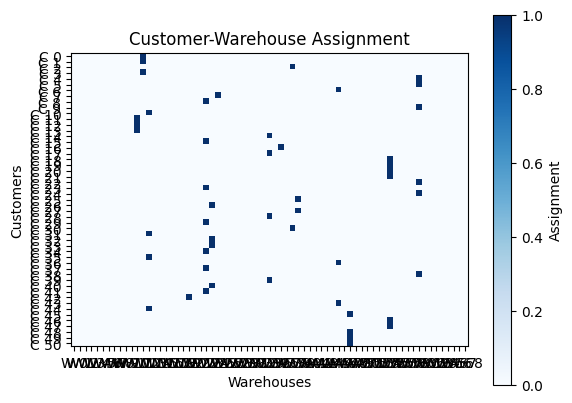

WallTime: 0.111929


In [ ]:

def main():
    # Model
    model = cp.CpModel()
    
    # Data declaration
    p = 15
    num_customers = 51
    customers = list(range(num_customers))
    num_warehouses = 69
    warehouses = list(range(num_warehouses))
    distance = array_without_indexes.transpose()


    # Variable declaration
    open_stops = [model.NewIntVar(0, 1, 'open_stops[%i]' % w) for w in warehouses]
    x = {}
    for c in customers:
        for w in warehouses:
            x[c, w] = model.NewIntVar(0, 1, 'x[%i,%i]' % (c, w))

    z = model.NewIntVar(0, sum([max(distance[c]) * demand[c] for c in customers]), 'z')

    # Constraints
    model.Add(z == sum([demand[c] * distance[c][w] * x[c, w] for c in customers for w in warehouses]))

    for c in customers:
        model.Add(sum([x[c, w] for w in warehouses]) == 1)


    model.Add(sum(open_stops) == p)
    for c in customers:
        for w in warehouses:
            model.Add(x[c, w] <= open_stops[w])

    # Objective function
    model.Minimize(z)

    # Model solution
    solver = cp.CpSolver()
    status = solver.Solve(model)
    print("Solver status:", solver.StatusName(status))

    if status in [cp.OPTIMAL, cp.FEASIBLE]:
        print('z:', solver.Value(z))
        print('open:', [solver.Value(open_stops[w]) for w in warehouses])
        for c in customers:
            for w in warehouses:
                print(solver.Value(x[c, w]), end=' ')
            print()
        print()

        plot_assignment(customers, warehouses, x, solver)

    print('WallTime:', solver.WallTime())

if __name__ == '__main__':
    main()

In [ ]:
# List of bus IDs corresponding to the open array
bus_ids = bus_terminals['id'].tolist()

# Open array from the solver output
open_array = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

# Get the IDs of the open bus stops
open_bus_ids = [bus_ids[i] for i, is_open in enumerate(open_array) if is_open == 1]

print("Open bus IDs:", open_bus_ids)

Open bus IDs: ['BD14', 'BD15', 'BD16', 'BT16', 'BT03', 'BT08', 'BT24', 'BL14', 'BD04', 'BT11', 'BT06', 'BT21', 'BL20', 'BT18', 'BL23']


In [ ]:
# Filter bus_terminals to include only the selected bus stops
selected_bus_terminals = bus_terminals[bus_terminals['id'].isin(open_bus_ids)]

# Create a map centered at the average latitude and longitude
map_center = [accomodations_clusters['avg_latitude'].mean(), accomodations_clusters['avg_longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# Add markers for each cluster
for _, row in accomodations_clusters.iterrows():
    folium.Marker(
        location=[row['avg_latitude'], row['avg_longitude']],
        popup=f"ID: {row['id']}<br>Total Accommodates: {row['total_accommodates']}<br>Count: {row['count']}",
    ).add_to(m)

# Add markers for each venue
for _, row in venues.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"ID: {row['id']}<br>Approx. Capacity: {row['Approx. Capacity']}<br>Venue: {row['Venue']}",
        icon=folium.Icon(color='purple')
    ).add_to(m)

# Add markers for the selected bus terminals
for _, row in selected_bus_terminals.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"ID: {row['id']}<br>Terminal: {row['FACILITY']}",
        icon=folium.Icon(color='green')
    ).add_to(m)

# Display the map
m

VRP

In [ ]:
# Create a list of pickup and delivery pairs
pickup_delivery_pairs = [(accommodation, venue) for accommodation in accomodations_clusters['id'] for venue in venues['id']]

print("Pickup and Delivery Pairs:")
print(pickup_delivery_pairs)

Pickup and Delivery Pairs:
[('A1', 'V1'), ('A1', 'V2'), ('A1', 'V3'), ('A1', 'V4'), ('A1', 'V5'), ('A1', 'V6'), ('A1', 'V7'), ('A1', 'V8'), ('A1', 'V9'), ('A1', 'V10'), ('A1', 'V11'), ('A1', 'V12'), ('A1', 'V13'), ('A1', 'V14'), ('A1', 'V15'), ('A1', 'V16'), ('A1', 'V17'), ('A1', 'V18'), ('A1', 'V19'), ('A1', 'V20'), ('A1', 'V21'), ('A1', 'V22'), ('A1', 'V23'), ('A1', 'V24'), ('A1', 'V25'), ('A1', 'V26'), ('A1', 'V27'), ('A1', 'V28'), ('A1', 'V29'), ('A1', 'V30'), ('A1', 'V31'), ('A1', 'V32'), ('A1', 'V33'), ('A2', 'V1'), ('A2', 'V2'), ('A2', 'V3'), ('A2', 'V4'), ('A2', 'V5'), ('A2', 'V6'), ('A2', 'V7'), ('A2', 'V8'), ('A2', 'V9'), ('A2', 'V10'), ('A2', 'V11'), ('A2', 'V12'), ('A2', 'V13'), ('A2', 'V14'), ('A2', 'V15'), ('A2', 'V16'), ('A2', 'V17'), ('A2', 'V18'), ('A2', 'V19'), ('A2', 'V20'), ('A2', 'V21'), ('A2', 'V22'), ('A2', 'V23'), ('A2', 'V24'), ('A2', 'V25'), ('A2', 'V26'), ('A2', 'V27'), ('A2', 'V28'), ('A2', 'V29'), ('A2', 'V30'), ('A2', 'V31'), ('A2', 'V32'), ('A2', 'V33'), 

In [ ]:
from ortools.constraint_solver import pywrapcp, routing_enums_pb2

def create_data_model():
    data = {}
    # Your full distance matrix (NxN)
    data['distance_matrix'] = [...]  # Fill with actual matrix

    # List of pickup and delivery pairs: [pickup_index, delivery_index]
    data['pickups_deliveries'] = [
        [pickup1, venue1],
        [pickup2, venue1],
        # ...
    ]

    # Number of vehicles
    data['num_vehicles'] = 15

    # Starting and ending depots (bus stops chosen from FLP)
    data['starts'] = [depot0, depot1, ..., depot14]  # Fill with actual depot indices
    data['ends'] = data['starts']  # Each vehicle returns to the same starting depot

    # Set of all venue indices
    data['venue_indices'] = set([venue1])  # Could be more than one venue

    return data

In [ ]:
def main():
    data = create_data_model()
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'],
                                           data['starts'],
                                           data['ends'])
    routing = pywrapcp.RoutingModel(manager)

    # Distance callback
    def distance_callback(from_index, to_index):
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Add pickup and delivery constraints
    for pickup, delivery in data['pickups_deliveries']:
        pickup_index = manager.NodeToIndex(pickup)
        delivery_index = manager.NodeToIndex(delivery)
        routing.AddPickupAndDelivery(pickup_index, delivery_index)
        routing.solver().Add(routing.VehicleVar(pickup_index) == routing.VehicleVar(delivery_index))
        routing.solver().Add(routing.CumulVar(pickup_index, 'Distance') <=
                             routing.CumulVar(delivery_index, 'Distance'))

    # Add a dummy distance dimension to allow vehicle constraints
    routing.AddDimension(
        transit_callback_index,
        0,  # no slack
        100000,  # large maximum distance
        True,
        'Distance'
    )

    # Constraint: each vehicle must visit at least one venue
    # This is a workaround using circuit constraint logic
    for vehicle_id in range(data['num_vehicles']):
        venue_visits = []
        for venue in data['venue_indices']:
            index = manager.NodeToIndex(venue)
            is_visited = routing.solver().IsEqualCstVar(routing.VehicleVar(index), vehicle_id)
            venue_visits.append(is_visited)

        # Vehicle must visit at least one venue
        routing.solver().Add(routing.solver().Sum(venue_visits) >= 1)

    # Search parameters
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # Solve
    solution = routing.SolveWithParameters(search_parameters)

    # Output
    if solution:
        for vehicle_id in range(data['num_vehicles']):
            index = routing.Start(vehicle_id)
            route = []
            while not routing.IsEnd(index):
                node_index = manager.IndexToNode(index)
                route.append(node_index)
                index = solution.Value(routing.NextVar(index))
            route.append(manager.IndexToNode(index))
            print(f'Route for vehicle {vehicle_id}: {route}')
    else:
        print("No solution found.")


if __name__ == '__main__':
    main()
